In [19]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [20]:
precios_sp500 = pd.read_csv('../data/preciosSP500.csv', index_col= 0, parse_dates=True)

retornos = np.log(precios_sp500).diff().dropna()

ret_sp500 = retornos.iloc[:, :-1]
ret_index = retornos[['SPX']]

In [21]:
ret_sp500_norm = (ret_sp500 - ret_sp500.mean())/ret_sp500.std()
ret_index_norm = (ret_index - ret_index.mean())/ret_index.std()

In [22]:
train_end = '2012-01-01'

ret_sp500_norm_train = ret_sp500_norm.loc[:train_end]
ret_sp500_norm_test = ret_sp500_norm.loc[train_end:]

ret_index_norm_train = ret_index_norm.loc[:train_end]
ret_index_norm_test = ret_index_norm.loc[train_end:]

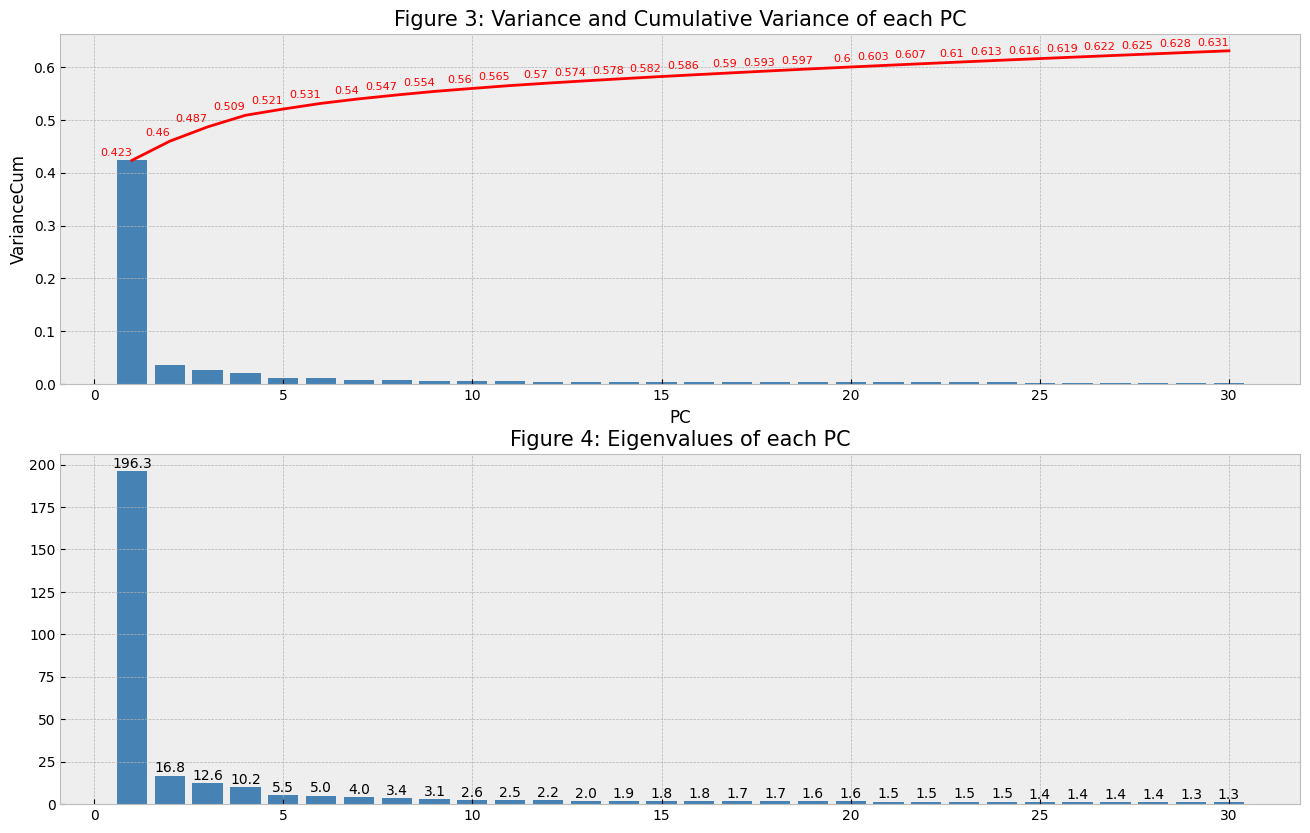

In [23]:
pca = PCA()

pca.fit(ret_sp500_norm_train)

summary30 = pd.DataFrame({'Variance' : pca.explained_variance_ratio_[0:30],
                          'VarianceCum' : pca.explained_variance_ratio_[0:30].cumsum(),
                          'Eigenvalue' : pca.explained_variance_[0:30],
                          'PC' : np.arange(1, len(pca.explained_variance_ratio_[0:30])+1)})

plt.style.use('bmh')
plt.figure(num = 3, figsize=(16,10))

plt.subplot(211)
plt.bar(data = summary30,
         height = 'Variance', x = 'PC', color="steelblue")
sns.lineplot(data = summary30,
         y = 'VarianceCum', x = 'PC', color="red")
for i, v in enumerate(round(summary30.VarianceCum,3)):
    plt.text(summary30.PC.tolist()[i], v+0.01, str(v), ha='right', 
             fontsize=8, color = 'red')
plt.title('Figure 3: Variance and Cumulative Variance of each PC', size=15)

plt.subplot(212)
plt.figure(num = 3, figsize=(16,10))
plt.bar(data = summary30,
         height = 'Eigenvalue', x = 'PC', color="steelblue")
for i, v in enumerate(round(summary30.Eigenvalue,1)):
    plt.text(summary30.PC.tolist()[i], v+2, str(v), ha='center', 
             fontsize=10, color = 'black')
plt.title('Figure 4: Eigenvalues of each PC', size=15)
plt.show()



In [24]:
pesos = pca.components_[0]/np.sum(pca.components_[0])

ret_cartera_train = pesos @ ret_sp500_norm_train.T

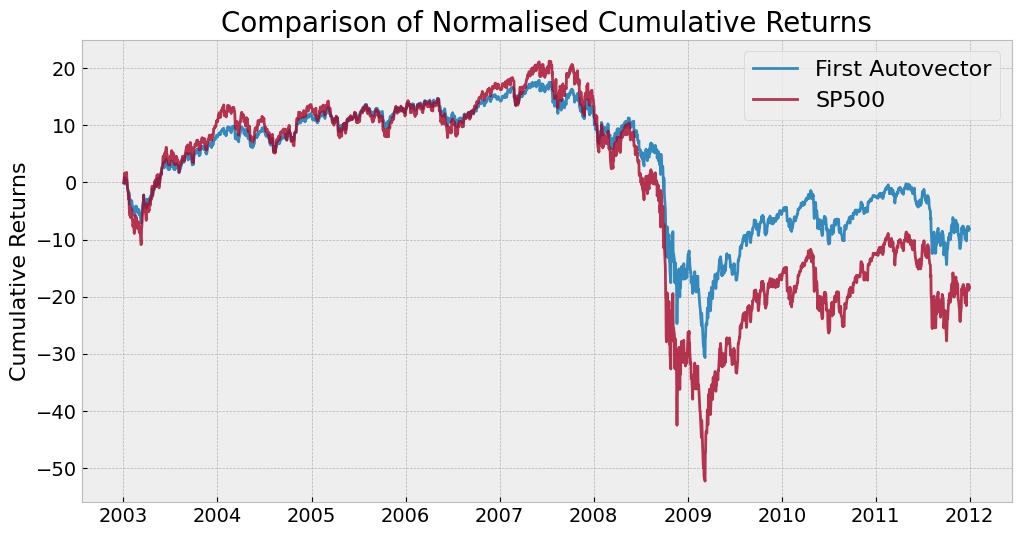

In [25]:
plt.style.use('bmh')  # Usando un estilo limpio y profesional

fig, ax = plt.subplots(figsize=(12, 6))  # Tamaño adecuado para inclusión en documentos

# Gráfico de la suma acumulada de retornos de la cartera
ax.plot(ret_cartera_train.cumsum(), label='First Autovector', linewidth=2)

# Gráfico de la suma acumulada de ret del índice normalizado
ax.plot(ret_index_norm_train.cumsum(), label='SP500', linewidth=2, alpha=0.8)

ax.set_title('Comparison of Normalised Cumulative Returns', fontsize=20)  # Título descriptivo
#ax.set_xlabel('Tiempo', fontsize=12)  # Etiqueta para el eje X
ax.set_ylabel('Cumulative Returns', fontsize=16)  # Etiqueta para el eje Y
ax.legend(fontsize=16)  # Leyenda con tamaño adecuado

ax.tick_params(labelsize=14)  # Adjust font size for tick labels

plt.grid(True)  # Añadir una cuadrícula para mejorar la legibilidad

# Guardar la figura en formato PDF para mejor calidad en LaTeX
plt.savefig('/workspace/imgs/retornos_acumulados.pdf', format='pdf', dpi=300)


plt.show()

In [26]:
ret_cartera_train.var()

0.4798314782819054

In [27]:
pca.explained_variance_ratio_[0]

0.42348773417877034